.# Лабораторная работа №1: Первичное исследование данных

## 1. Постановка задачи

### Описание датасета
Набор данных содержит подробную информацию об около 23 тысячах автомобилей в прокатах по РФ. Датасет охватывает такие параметры как марка, модель мощность, класс, тип кузова и многое другое


### Условный заказчик:
Автомобильные дилеры, сервисы проката автомобилей.


### Возможные задачи ИАД
1. Анализ рыночного предложения и ценообразования: Исследование зависимости цены автомобиля от технических характеристик (мощность, объем двигателя, привод, тип коробки передач), года выпуска и марки. Построение моделей предсказания рыночной стоимости.
2. Сегментация автомобильного парка и анализ потребительских предпочтений: Кластеризация автомобилей по техническим параметрам и цене для выявления основных рыночных сегментов. Анализ популярности различных типов кузова (SUV, седан, минивэн), марок и классов автомобилей в разных ценовых категориях.
3. Оптимизация автопарка для прокатных сервисов: Анализ взаимосвязи характеристик автомобилей (расход топлива, клиренс, объем багажника) и их потенциальной востребованности в прокате. Определение оптимального состава автопарка по классам и характеристикам для максимизации прибыли.

## 2. Паспорт датасета

### Загрузка данных

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
df = pd.read_csv('../data/cars_dataset.csv', low_memory=False)  # Путь к вашему файлу
print(f'Размер датасета: {df.shape[0]} строк, {df.shape[1]} столбцов')

df[['Seats', 'Doors', 'Year', 'Valves_per_cylinder', 'Cylinders', 'Maximum_speed']] = df[['Seats', 'Doors', 'Year', 'Valves_per_cylinder', 'Cylinders', 'Maximum_speed']].astype('int')
df[['Box', 'Drive_unit', 'Country', 'Drive', 'Boost_type', 'Cylinder_location', 'Front_Suspension_type', 'Car_class', 'Fuel', 'Engine_Location']] = df[['Box', 'Drive_unit', 'Country', 'Drive', 'Boost_type', 'Cylinder_location', 'Front_Suspension_type', 'Car_class', 'Fuel', 'Engine_Location']].astype('category')

df.head()

Размер датасета: 22702 строк, 55 столбцов


,Unnamed: 0,mark,Box,Drive_unit,Seats,Doors,Country,Engine,Volume,Color,...,Consumption,Engine_Power,Restyling,Release_start_series,End_Serial,Trunk_volume_max,Trunk_volume_min,Expense_city,Expense_track,Consumption_average
0,0,Mercedes-Benz,automatic,full,5,5,German,diesel,2.9,black,...,9.8,NaN,0.0,2018.0,2020.0,667.0,1941.0,11.5,9.2,9.8
1,1,Mercedes-Benz,automatic,full,5,5,German,diesel,2.9,green,...,9.6,NaN,0.0,2018.0,2020.0,667.0,1941.0,10.8,8.9,9.6
2,2,Mercedes-Benz,automatic,full,5,5,German,gasoline,4.0,black,...,12.1,direct injection (direct),0.0,2018.0,2020.0,667.0,1941.0,14.1,10.8,12.1
3,3,Mercedes-Benz,automatic,full,5,5,German,gasoline,4.0,black,...,12.1,direct injection (direct),0.0,2018.0,2020.0,667.0,1941.0,14.1,10.8,12.1
4,4,Mercedes-Benz,automatic,full,5,5,German,gasoline,4.0,gray,...,12.1,direct injection (direct),0.0,2018.0,2020.0,667.0,1941.0,14.1,10.8,12.1


### Структура данных

In [1]:
# Информация о столбцах и типах
df.info()

# Статистика по числовым признакам
df.describe()

NameError: name 'df' is not defined

## 3. Аудит качества данных

### 3.1. Пропуски

In [13]:
# Пропуски по столбцам
missing = pd.DataFrame({
    'Пропуски': df.isnull().sum(),
    'Доля (%)': (df.isnull().sum() / len(df) * 100).round(2)
}).sort_values('Пропуски', ascending=False)

missing[missing['Пропуски'] > 0]

,Пропуски,Доля (%)
Engine_Power,3562,15.69
Wheel_size,1540,6.78
Engine_Location,1357,5.98
Fuel,419,1.85
Boost_type,283,1.25
Cylinder_location,247,1.09
Car_class,221,0.97
Drive,191,0.84
Front_Suspension_type,191,0.84
Front_brakes,191,0.84


### 3.2. Дубликаты

In [14]:
duplicates = df.duplicated().sum()
print(f'Полных дубликатов строк: {duplicates}')

Полных дубликатов строк: 0


### 3.3. Выбросы (пример для одного признака)

Выбросов по методу IQR: 1644


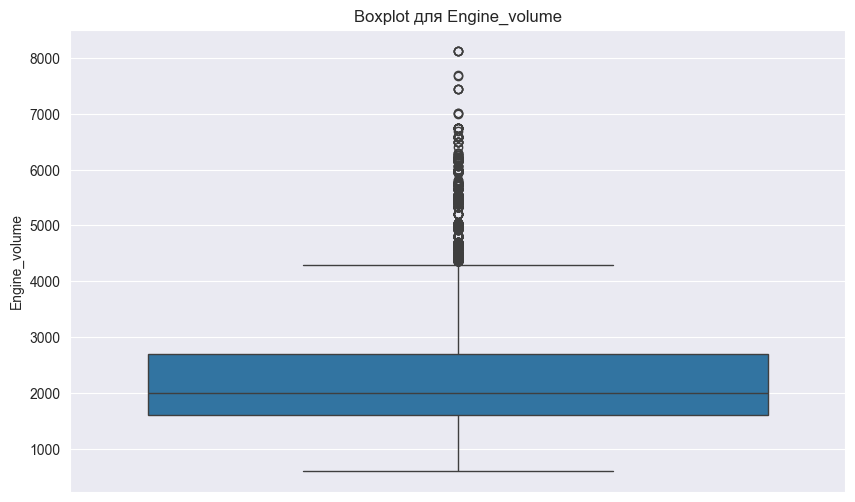

In [21]:
# Замените 'your_numeric_column' на реальное название столбца
column = 'Engine_volume'
Q1 = df[column].quantile(0.25)
Q3 = df[column].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
print(f'Выбросов по методу IQR: {len(outliers)}')

# Визуализация
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y=column)
plt.title(f'Boxplot для {column}')
plt.show()

## 4. Разведочный анализ (EDA)

### 4.1. Распределение числового признака

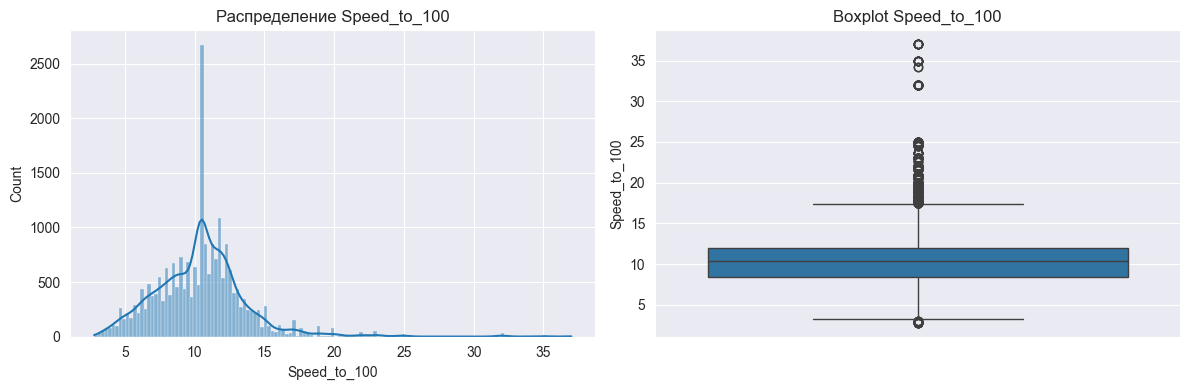

In [20]:
# Замените на реальный признак
numeric_col = 'Speed_to_100'

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(df[numeric_col], kde=True)
plt.title(f'Распределение {numeric_col}')

plt.subplot(1, 2, 2)
sns.boxplot(y=df[numeric_col])
plt.title(f'Boxplot {numeric_col}')
plt.tight_layout()
plt.show()

### 4.2. Анализ категориального признака

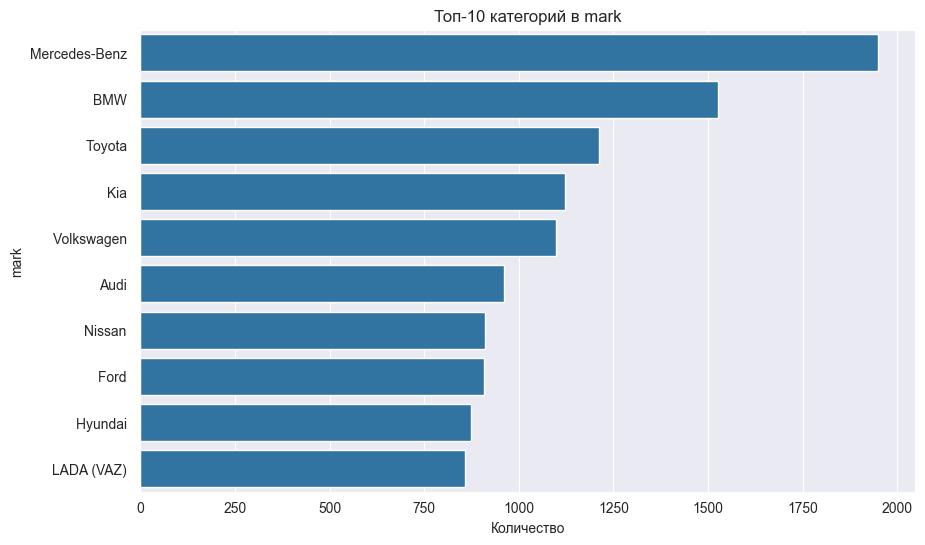

In [23]:
# Замените на реальный категориальный признак
cat_col = 'mark'

plt.figure(figsize=(10, 6))
top_categories = df[cat_col].value_counts().head(10)
sns.barplot(x=top_categories.values, y=top_categories.index)
plt.title(f'Топ-10 категорий в {cat_col}')
plt.xlabel('Количество')
plt.show()

## 5. Выводы

Детали в файле `report/quality_report.md`